# Question 1:

### Step 1: Import the necessary libraries

In [2]:
import pandas as pd

________________________________________________________________________________________________________________________________
### Step 2: Import the dataset from url.
________________________________________________________________________________________________________________________________
### Step 3: Assign it to a variable called users

In [5]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",delimiter="|")

In [6]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


________________________________________________________________________________________________________________________________
### Step 4: Discover what is the mean age per occupation

In [107]:
print("Mean age per Occupation: \n")
users.groupby('occupation').agg({"age":"mean"})

Mean age per Occupation: 



,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


________________________________________________________________________________________________________________________________
### Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [41]:
new_users = users.groupby("occupation")["gender"].value_counts(normalize=True).unstack()

# Taking the ratio of males
new_users['M_ratio'] = new_users['M'] / (new_users['M'] + new_users['F'])

new_users.sort_values(by="M_ratio",ascending=False)


gender,F,M,M_ratio
occupation,,,
engineer,0.029851,0.970149,0.970149
technician,0.037037,0.962963,0.962963
retired,0.071429,0.928571,0.928571
programmer,0.090909,0.909091,0.909091
executive,0.093750,0.906250,0.906250
scientist,0.096774,0.903226,0.903226
entertainment,0.111111,0.888889,0.888889
lawyer,0.166667,0.833333,0.833333
salesman,0.250000,0.750000,0.750000


________________________________________________________________________________________________________________________________
### Step 6: For each occupation, calculate the minimum and maximum ages

In [96]:
print("Minimum and Maximum ages for each Occupation: \n")
users.groupby("occupation")["age"].agg(['min','max'])

Minimum and Maximum ages for each Occupation: 



,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


________________________________________________________________________________________________________________________________
### Step 7:  For each combination of occupation and sex, calculate the mean age

In [93]:
print("Mean age for each combination on Gender and Occupation: \n")
users.groupby(["occupation","gender"], as_index=False)["age"].agg("mean")

Mean age for each combination on Gender and Occupation: 



,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


________________________________________________________________________________________________________________________________
### Step8 : For each occupation present the percentage of women and men

In [94]:
df2 = users.groupby(["occupation","gender"]).agg({"gender":"count"})
print("Count of Men and Women for each Occupation: \n")
df2

Count of Men and Women for each Occupation: 



gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [95]:
print("Percentage of Women and Men for each Occupation: \n")
df2.groupby(level=0).apply(lambda x:(x/x.sum())*100)

Percentage of Women and Men for each Occupation: 



gender
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________
# Question 2:

### Step 1: Import the necessary libraries

The library "pandas" has already been initialialized in the start of document

________________________________________________________________________________________________________________________________
### Step 2: Import the dataset from this address
________________________________________________________________________________________________________________________________
### Step 3: Assign it to a variable called euro12

In [4]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")


In [5]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


________________________________________________________________________________________________________________________________
### Step 4: Select only the Goal column

In [242]:
print("Showing only Goals Column: ")
euro12[["Goals"]]

Showing only Goals Column: 


,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


________________________________________________________________________________________________________________________________
### Step 5: How many team participated in the Euro2012?

In [241]:
print("Number of teams that participated in Euro2012: {}".format(euro12["Team"].count()))


Number of teams that participated in Euro2012: 16


________________________________________________________________________________________________________________________________
### Step 6: What is the number of columns in the dataset?

In [149]:
print("Number of Columns in Dataset: {} ".format(len(euro12.columns)))

Number of Columns in Dataset: 35 


________________________________________________________________________________________________________________________________
### Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [177]:
discipline = euro12.loc[:,["Team","Yellow Cards","Red Cards"]]

In [239]:
print("Dataframe showing only columns - Team, Yellow Cards, Red Cards:")
discipline

Dataframe showing only columns - Team, Yellow Cards, Red Cards:


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


________________________________________________________________________________________________________________________________
### Step 8: Sort the teams by Red Cards, then to Yellow Cards

In [238]:
print("Teams Sorted by Red Cards and then by Yellow Cards:")
euro12.sort_values(by=["Red Cards","Yellow Cards"])

Teams Sorted by Red Cards and then by Yellow Cards:


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16


________________________________________________________________________________________________________________________________
### Step 9: Calculate the mean Yellow Cards given per Team

In [234]:
 new_df = euro12.copy()


In [237]:
print("Mean Yellow Cards per Team: ")

new_df["Yellow Cards"] = new_df.apply(lambda x: x["Yellow Cards"]/new_df["Yellow Cards"].sum(),axis=1)
new_df.loc[:,["Team","Yellow Cards"]]

Mean Yellow Cards per Team: 


,Team,Yellow Cards
0,Croatia,0.075630
1,Czech Republic,0.058824
2,Denmark,0.033613
3,England,0.042017
4,France,0.050420
5,Germany,0.033613
6,Greece,0.075630
7,Italy,0.134454
8,Netherlands,0.042017
9,Poland,0.058824


________________________________________________________________________________________________________________________________
### Step 10: Filter teams that scored more than 6 goals

In [248]:
euro12[euro12["Goals"]>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


________________________________________________________________________________________________________________________________
### Step 11: Select the teams that start with G

In [250]:
euro12[euro12["Team"].str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


________________________________________________________________________________________________________________________________
### Step 12: Select the first 7 columns

In [254]:
euro12[:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


________________________________________________________________________________________________________________________________
### Step 13: Select all columns except the last 3

In [255]:
euro12[:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


________________________________________________________________________________________________________________________________
### Step 14: Present only the Shooting Accuracy from England, Italy and Russia

In [43]:
euro12.loc[euro12["Team"].isin(["England","Italy","Russia"]),["Team","Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________
# Question 3:

### Step 1:  Import the necessary libraries

In [42]:
import numpy as np
import pandas as pd

________________________________________________________________________________________________________________________________
### Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [53]:
np.random.seed(0)
series1 = pd.Series([np.random.randint(1,4) for i in range(100)])
series2 = pd.Series([np.random.randint(1,3) for i in range(100)])
series3 = pd.Series([np.random.randint(10000,30000) for i in range(100)])



print(series1.head(),series2.head(),series3.head())

0    1
1    2
2    1
3    2
4    2
dtype: int64 0    1
1    2
2    1
3    2
4    2
dtype: int64 0    23429
1    23907
2    12721
3    20088
4    27312
dtype: int64


________________________________________________________________________________________________________________________________
### Step 3. Create a DataFrame by joinning the Series by column

In [56]:
df = pd.DataFrame({
    'Col1': series1,
    'Col2': series2, 
    'Col3': series3
})

print('DataFrame by joining the Series by column: ')
print()
df.head()

DataFrame by joining the Series by column: 



,Col1,Col2,Col3
0,1,1,23429
1,2,2,23907
2,1,1,12721
3,2,2,20088
4,2,2,27312


________________________________________________________________________________________________________________________________
### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [57]:
df.rename(columns = {'Col1': 'bedrs', 'Col2': 'bathrs','Col3':'price_sqr_meter'}, inplace = True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,23429
1,2,2,23907
2,1,1,12721
3,2,2,20088
4,2,2,27312


________________________________________________________________________________________________________________________________
### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [58]:
bigcolumn = pd.DataFrame({
    'bigcolumn': pd.concat([series1, series2, series3])  
})

print('DataFrame with the values of the 3 Series: ')

bigcolumn

DataFrame with the values of the 3 Series: 


,bigcolumn
0,1
1,2
2,1
3,2
4,2
...,...
95,23634
96,21605
97,10423
98,10967


________________________________________________________________________________________________________________________________
### Step 6. Ops it seems it is going only until index 99. Is it true?

### Yes, it is going only until index 99 because series hadd index until 99.

________________________________________________________________________________________________________________________________
### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [59]:
bigcolumn = bigcolumn.reset_index(drop=True)
print('Reindexing the dataframe so it goes from 0 to 299: ')


bigcolumn

Reindexing the dataframe so it goes from 0 to 299: 


,bigcolumn
0,1
1,2
2,1
3,2
4,2
...,...
295,23634
296,21605
297,10423
298,10967


______________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________
# Question 4

### Step 1. Import the necessary libraries

The library "pandas" has already been initialialized in the start of document

### Step 2. Import the dataset from the attached file wind.txt

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [240]:
data = pd.read_fwf("wind.txt")
data.head()


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [241]:
def fix_year(year):
    
        return 2000 + year

# Step 4
data['Yr'] = data['Yr'].apply(fix_year)
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data.head()


,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,2061,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,2061,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,2061,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,2061,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,2061,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [242]:
data.insert(0, 'date',data.pop('date'))

In [243]:
data.head()

,date,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,2061,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,2061,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,2061,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,2061,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,2061,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

No, we don't have data from 2061, we need to fix it.

In [244]:
data['year'] = data['year'].apply(lambda x : 1900 + (x-2000 ))

In [245]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])


In [246]:
data.pop("year")
data.pop("day")
data.pop("month")

0        1
1        1
2        1
3        1
4        1
        ..
6569    12
6570    12
6571    12
6572    12
6573    12
Name: month, Length: 6574, dtype: int64

In [247]:
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [248]:
data.set_index("date",inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [255]:
missing_values_per_location = data.isnull().sum()
print("Missing Values Count Per Location:")
missing_values_per_location

Missing Values Count Per Location:


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [257]:
total_non_missing_values = data.notnull().sum().sum()
print("Total Number of Non-Missing Values:", total_non_missing_values)

Total Number of Non-Missing Values: 78857


### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
### A single number for the entire dataset.

In [258]:
mean_windspeed = data.mean().mean()
print("Mean Windspeed Over All Locations and Times:", mean_windspeed)

Mean Windspeed Over All Locations and Times: 10.227982360836938


### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
### A different set of numbers for each location

In [259]:
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

print("Statistics for Windspeed at Each Location:")
print(loc_stats)

Statistics for Windspeed at Each Location:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
### A different set of numbers for each day.

In [260]:
day_stats = data.resample('D').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

print("Statistics for Windspeed Across All Locations Each Day:")
print(day_stats)

Statistics for Windspeed Across All Locations Each Day:
              RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-

### Step 12. Downsample the record to a yearly frequency for each location.

In [262]:
yearly_data = data.resample('Y').mean()
print("Yearly Downsampled Data for Each Location:")
print(yearly_data)

Yearly Downsampled Data for Each Location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123

### Step 13. Downsample the record to a monthly frequency for each location.

In [263]:
monthly_data = data.resample('M').mean()

print("Monthly Downsampled Data for Each Location:")
print(monthly_data)

Monthly Downsampled Data for Each Location:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-

### Step 14. Downsample the record to a weekly frequency for each location.

In [264]:
weekly_data = data.resample('W').mean()

print("Weekly Downsampled Data for Each Location:")
print(weekly_data)

Weekly Downsampled Data for Each Location:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000 

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [265]:
weekly_stats = data.resample('W').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

print("Weekly Statistics for Windspeed Across All Locations:")
print(weekly_stats)


Weekly Statistics for Windspeed Across All Locations:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
...           ...    ...        ...       ...    ...    ...        ...   
1978-12-03   9.08  21.29  14.934286  4.931754   4.54  21.34  11.232857   
1978-12-10   9.92  29.33  20.740000  7.215012  12.54  24.79  19.190000   
1978-12-17   9.87  23.13  16.758571  4.499431   3.21  24.04  14.692857   
1978-12-24   6.21  16.62  11.155714  3.522759   3.63  13.2

# Question 5 :

### Step 1: Import the necessary libraries
### Step 2: Import the dataset from this address.
### Step 3: Assign it to a variable called chipo.

In [266]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")


### Step 4: See the first 10 entries

In [267]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5: What is the number of observations in the dataset?

In [268]:
print("Number or observations: {}".format(chipo.shape[0]))

Number or observations: 4622


### Step 6: What is the number of columns in the dataset?

In [269]:
print("Number of columns: {}".format(chipo.shape[1]))

Number of columns: 5


### Step 7: Print the name of all the columns.

In [270]:
print("Name of the columns: \n")
for i in chipo.columns:
    print(i)

Name of the columns: 

order_id
quantity
item_name
choice_description
item_price


### Step 8: How is the dataset indexed?

In [271]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9: Which was the most-ordered item?

In [8]:
grouped = chipo.groupby("item_name").count().reset_index()

In [9]:
group_sorted =grouped.sort_values(by="order_id",ascending=False).reset_index()
group_sorted

,index,item_name,order_id,quantity,choice_description,item_price
0,17,Chicken Bowl,726,726,726,726
1,18,Chicken Burrito,553,553,553,553
2,25,Chips and Guacamole,479,479,0,479
3,39,Steak Burrito,368,368,368,368
4,10,Canned Soft Drink,301,301,301,301
5,38,Steak Bowl,211,211,211,211
6,23,Chips,211,211,0,211
7,6,Bottled Water,162,162,0,162
8,22,Chicken Soft Tacos,115,115,115,115
9,21,Chicken Salad Bowl,110,110,110,110


In [10]:
print("Most ordered item is: {}".format(group_sorted["item_name"][0]))

Most ordered item is: Chicken Bowl


### Step 10: For the most-ordered item, how many items were ordered?

In [12]:
print("{} was ordered {} times".format(group_sorted["item_name"][0],group_sorted["quantity"][0]))

Chicken Bowl was ordered 726 times


### Step 11: What was the most ordered item in the choice_description column?

In [13]:
choice_Des_group = chipo.groupby("choice_description").count().reset_index()
choice_Des_group

,choice_description,order_id,quantity,item_name,item_price
0,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",1,1,1,1
1,"[Adobo-Marinated and Grilled Chicken, [Sour Cr...",1,1,1,1
2,[Adobo-Marinated and Grilled Chicken],1,1,1,1
3,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",1,1,1,1
4,[Adobo-Marinated and Grilled Steak],1,1,1,1
...,...,...,...,...,...
1038,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",2,2,2,2
1039,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",1,1,1,1
1040,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",1,1,1,1
1041,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",1,1,1,1


In [14]:
choice_Des_group_sorted = choice_Des_group.sort_values(by="order_id",ascending=False).reset_index()

In [15]:
choice_Des_group_sorted

,index,choice_description,order_id,quantity,item_name,item_price
0,15,[Diet Coke],134,134,134,134
1,14,[Coke],123,123,123,123
2,583,[Sprite],77,77,77,77
3,256,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",42,42,42,42
4,254,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",40,40,40,40
...,...,...,...,...,...,...
1038,482,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1,1,1,1
1039,485,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1,1,1,1
1040,488,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1,1,1,1
1041,489,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",1,1,1,1


In [128]:
print("Most ordered item in choice description column: {}".format(choice_Des_group_sorted["choice_description"][0]))

Most ordered item in choice description column: [Diet Coke]


### Step 12: How many items were orderd in total?

In [34]:
grouped_items = chipo.groupby("item_name").count().reset_index()
grouped_items

,item_name,order_id,quantity,choice_description,item_price
0,6 Pack Soft Drink,54,54,54,54
1,Barbacoa Bowl,66,66,66,66
2,Barbacoa Burrito,91,91,91,91
3,Barbacoa Crispy Tacos,11,11,11,11
4,Barbacoa Salad Bowl,10,10,10,10
5,Barbacoa Soft Tacos,25,25,25,25
6,Bottled Water,162,162,0,162
7,Bowl,2,2,2,2
8,Burrito,6,6,6,6
9,Canned Soda,104,104,104,104


In [35]:
print("Total items ordered: {}".format(grouped_items.shape[0]))

Total items ordered: 50


### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [272]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))


print("Item price type after conversion:")
print(chipo['item_price'].dtype)
print("\n")

Item price type after conversion:
float64




### Step 14: How much was the revenue for the period in the dataset?

In [276]:
total_revenue = (chipo["quantity"]*chipo["item_price"]).sum()
print("Total revenue for the period: {}".format(total_revenue))

Total revenue for the period: 39237.02


### Step 15: How many orders were made in the period?

In [32]:
print("Total orders made: {}".format(chipo.shape[0]))

Total orders made: 4622


### Step 16. What is the average revenue amount per order?

In [278]:
chipo.groupby('order_id').agg({'item_price': ['mean']})

,item_price
,mean
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000


### Step 17: How many different items are sold?

In [38]:
print("Total number of different items sold: {}".format(grouped_items["item_name"].count()))

Total number of different items sold: 50


# Question 6:

In [281]:
import matplotlib.pyplot as plt

In [282]:
import numpy as np

In [284]:
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")


In [285]:
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


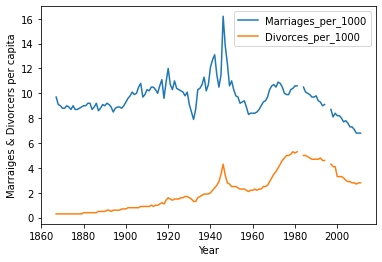

In [299]:
plot=plt.plot(df['Year'],df[['Marriages_per_1000','Divorces_per_1000']])

plt.xlabel("Year")
plt.ylabel("Marraiges & Divorcers per capita")
plt.legend(df[['Marriages_per_1000','Divorces_per_1000']])
plt.show()

# Question 7:

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
### Don't forget to label your axes!

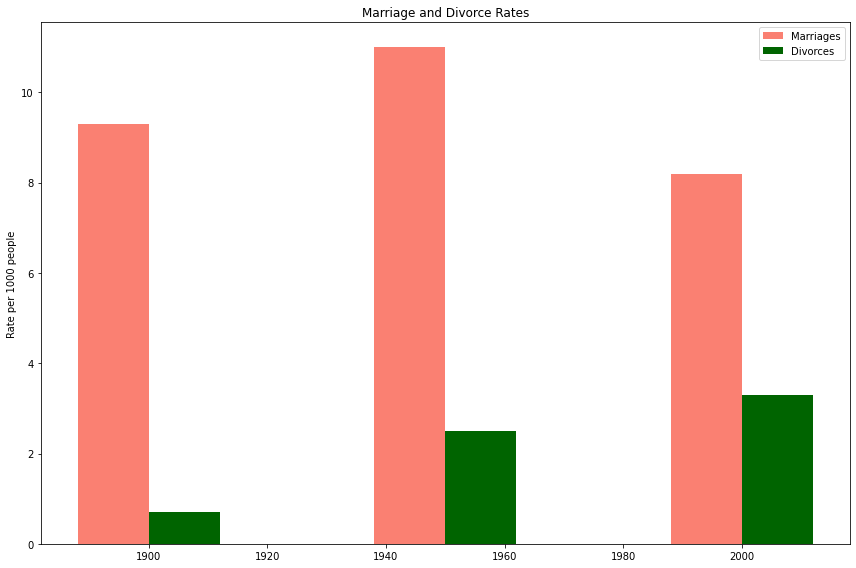

In [302]:
years = [1900, 1950, 2000]
data = df[df['Year'].isin(years)]

# Plot 
fig, ax = plt.subplots(figsize=(12, 8))


# Calculate bar width 
bar_width = 12

# Plot bars
ax.bar(data['Year'] - bar_width/2, data['Marriages_per_1000'],  
       width=bar_width, color='salmon', 
       label='Marriages')

ax.bar(data['Year'] + bar_width/2, data['Divorces_per_1000'], 
       width=bar_width, color='darkgreen',
       label='Divorces')
       
# Final touches       
ax.set_ylabel('Rate per 1000 people')
ax.set_title('Marriage and Divorce Rates')
ax.legend()
plt.tight_layout()
plt.savefig('rates.png', dpi=120)

# Question 8 :

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
### Don't forget to label your axes!

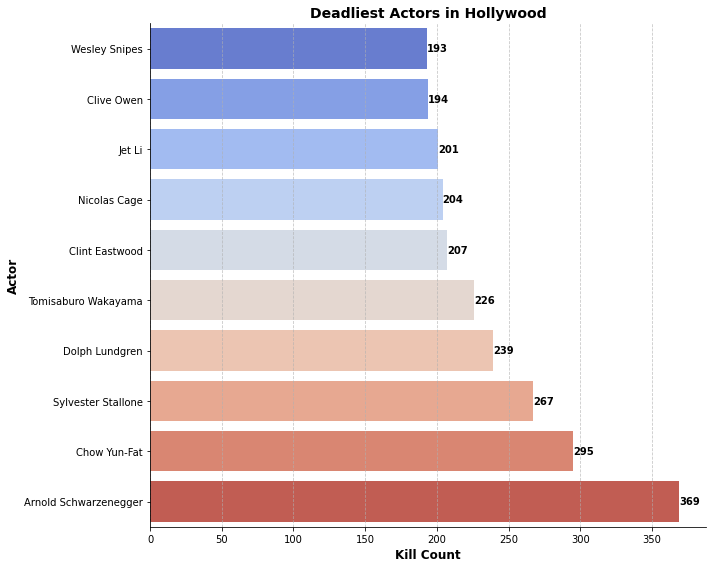

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

sorted_data = data.sort_values(by='Count', ascending=True)

custom_palette = sns.color_palette("coolwarm", n_colors=len(sorted_data))

plt.figure(figsize=(10, 8))  # Set the figure size
sns.barplot(x='Count', y='Actor', data=sorted_data, palette=custom_palette)

for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, f"{value:,}", ha='left', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Kill Count', fontweight='bold', fontsize=12)  # X-axis label
plt.ylabel('Actor', fontweight='bold', fontsize=12)  # Y-axis label
plt.title('Deadliest Actors in Hollywood', fontweight='bold', fontsize=14) 

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine() 

plt.tight_layout()
plt.show()

# Question 9
### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

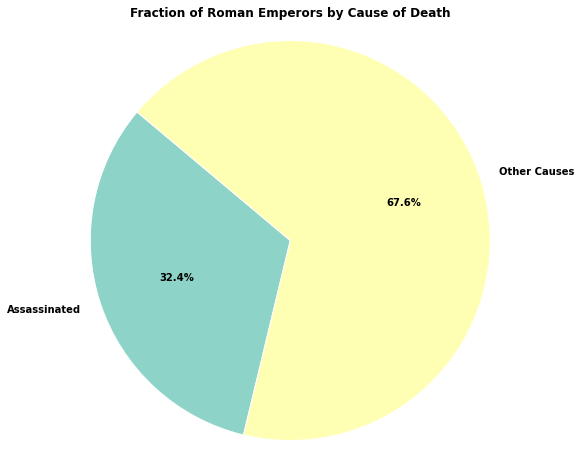

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
assassinated_count = len(assassinated_emperors)

percentage_assassinated = (assassinated_count / total_emperors) * 100

custom_palette = sns.color_palette("Set3", n_colors=2)

plt.figure(figsize=(8, 8))  # Set the figure size
plt.title('Fraction of Roman Emperors by Cause of Death', fontweight='bold')

plt.pie([assassinated_count, total_emperors - assassinated_count], 
        labels=['Assassinated', 'Other Causes'], colors=custom_palette,
        autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  

plt.axis('equal')

plt.show()

# Question 10
### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
### Don't forget to label your axes!
### Color each dot according to its year.

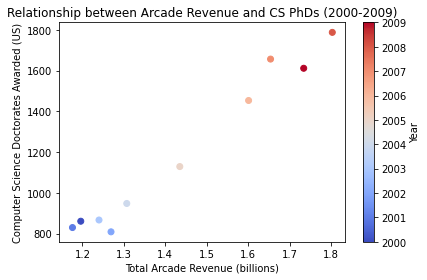

In [305]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')

plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='coolwarm')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title("Relationship between Arcade Revenue and CS PhDs (2000-2009)")

plt.colorbar().set_label('Year')

plt.tight_layout()
plt.show()